

Here we are reading the standard 'coins.png' image which we will perform the DFT on. Note that the 'coins.png' is standard with MATLAB toolkit so that simplifies this a lot (if you download any image and replace it in the imread parameter while specifying path, that should also work!) You will see the image at the end after running the inverse!


In [1]:
c = imread('coins.png');
c = double(c); %better for calculations - more precision

%computes length+width of the image (240,300)
[l,w]=size(c);


This is the actual implementation of the Discrete Fourier Transform: this implementation essentially uses a meshgrid to get the values of "m" and "n" in computing the DFT and constructs two transform matrices \- one for applying to the columns and one for the lengths \- NOTE that this is important because the image isn't a square this impelmentation also will normalize at the end. We can also choose to use the *fft2* command in MATLAB to perform the Fast Fourier Transform (instead of the DFT).


In [2]:
x=[0:l-1];
[x, u]=meshgrid(x,x);
dft_rows=((exp(i*(-2*pi)./l)).^((u).*(x)));

y=[0:w-1];
[y, v]=meshgrid(y,y);
dft_cols=((exp(i*(-2*pi)./w)).^((v).*(y)));
dft_cols = dft_cols.';

%here is the normalization of the DFT (1/sqrt(N)) for
%both matrices
res = (1/(sqrt(l*w)))*(dft_rows*c*dft_cols);


Here we are splitting the real and imaginary coefficients. Note that the imaginary coefficients denote the frequencies of the DFT result, while the real coefficients denote the amplitude.



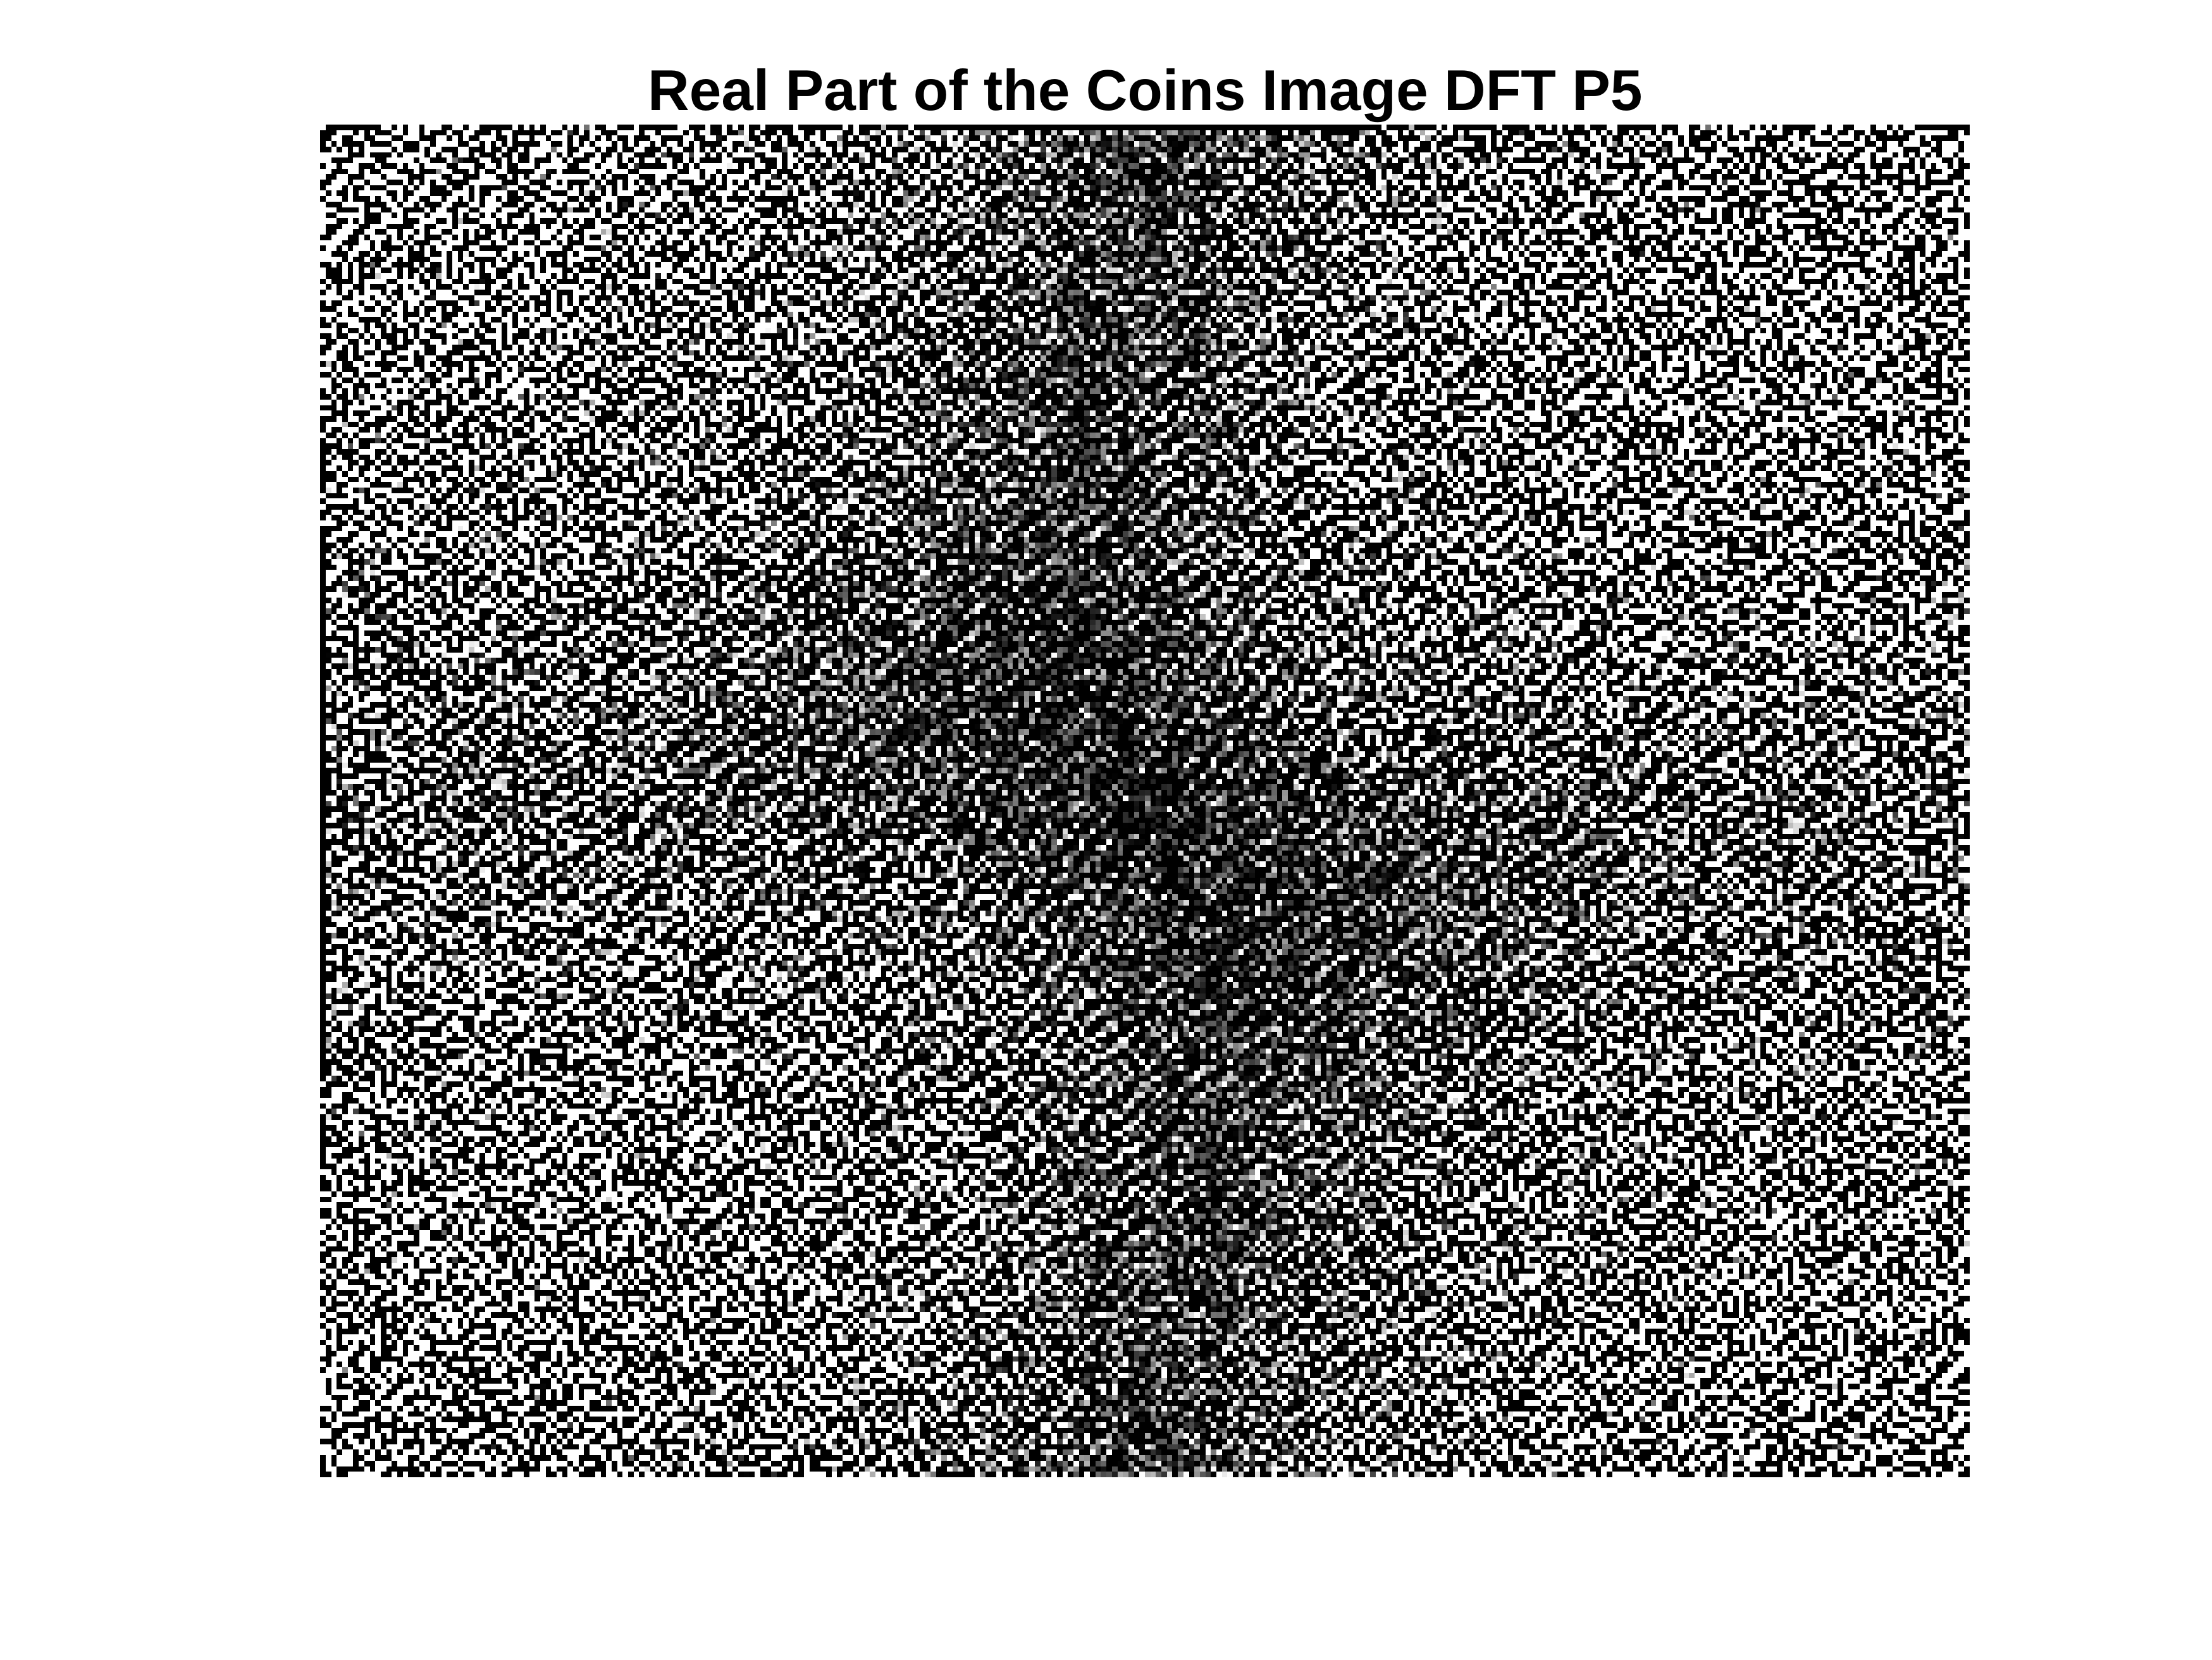

In [3]:
%splitting real and imaginary
real_res = real(res);
imag_res = imag(res);

%displaying both the images
figure;
imshow(real_res);
title('Real Part of the Coins Image DFT P5');


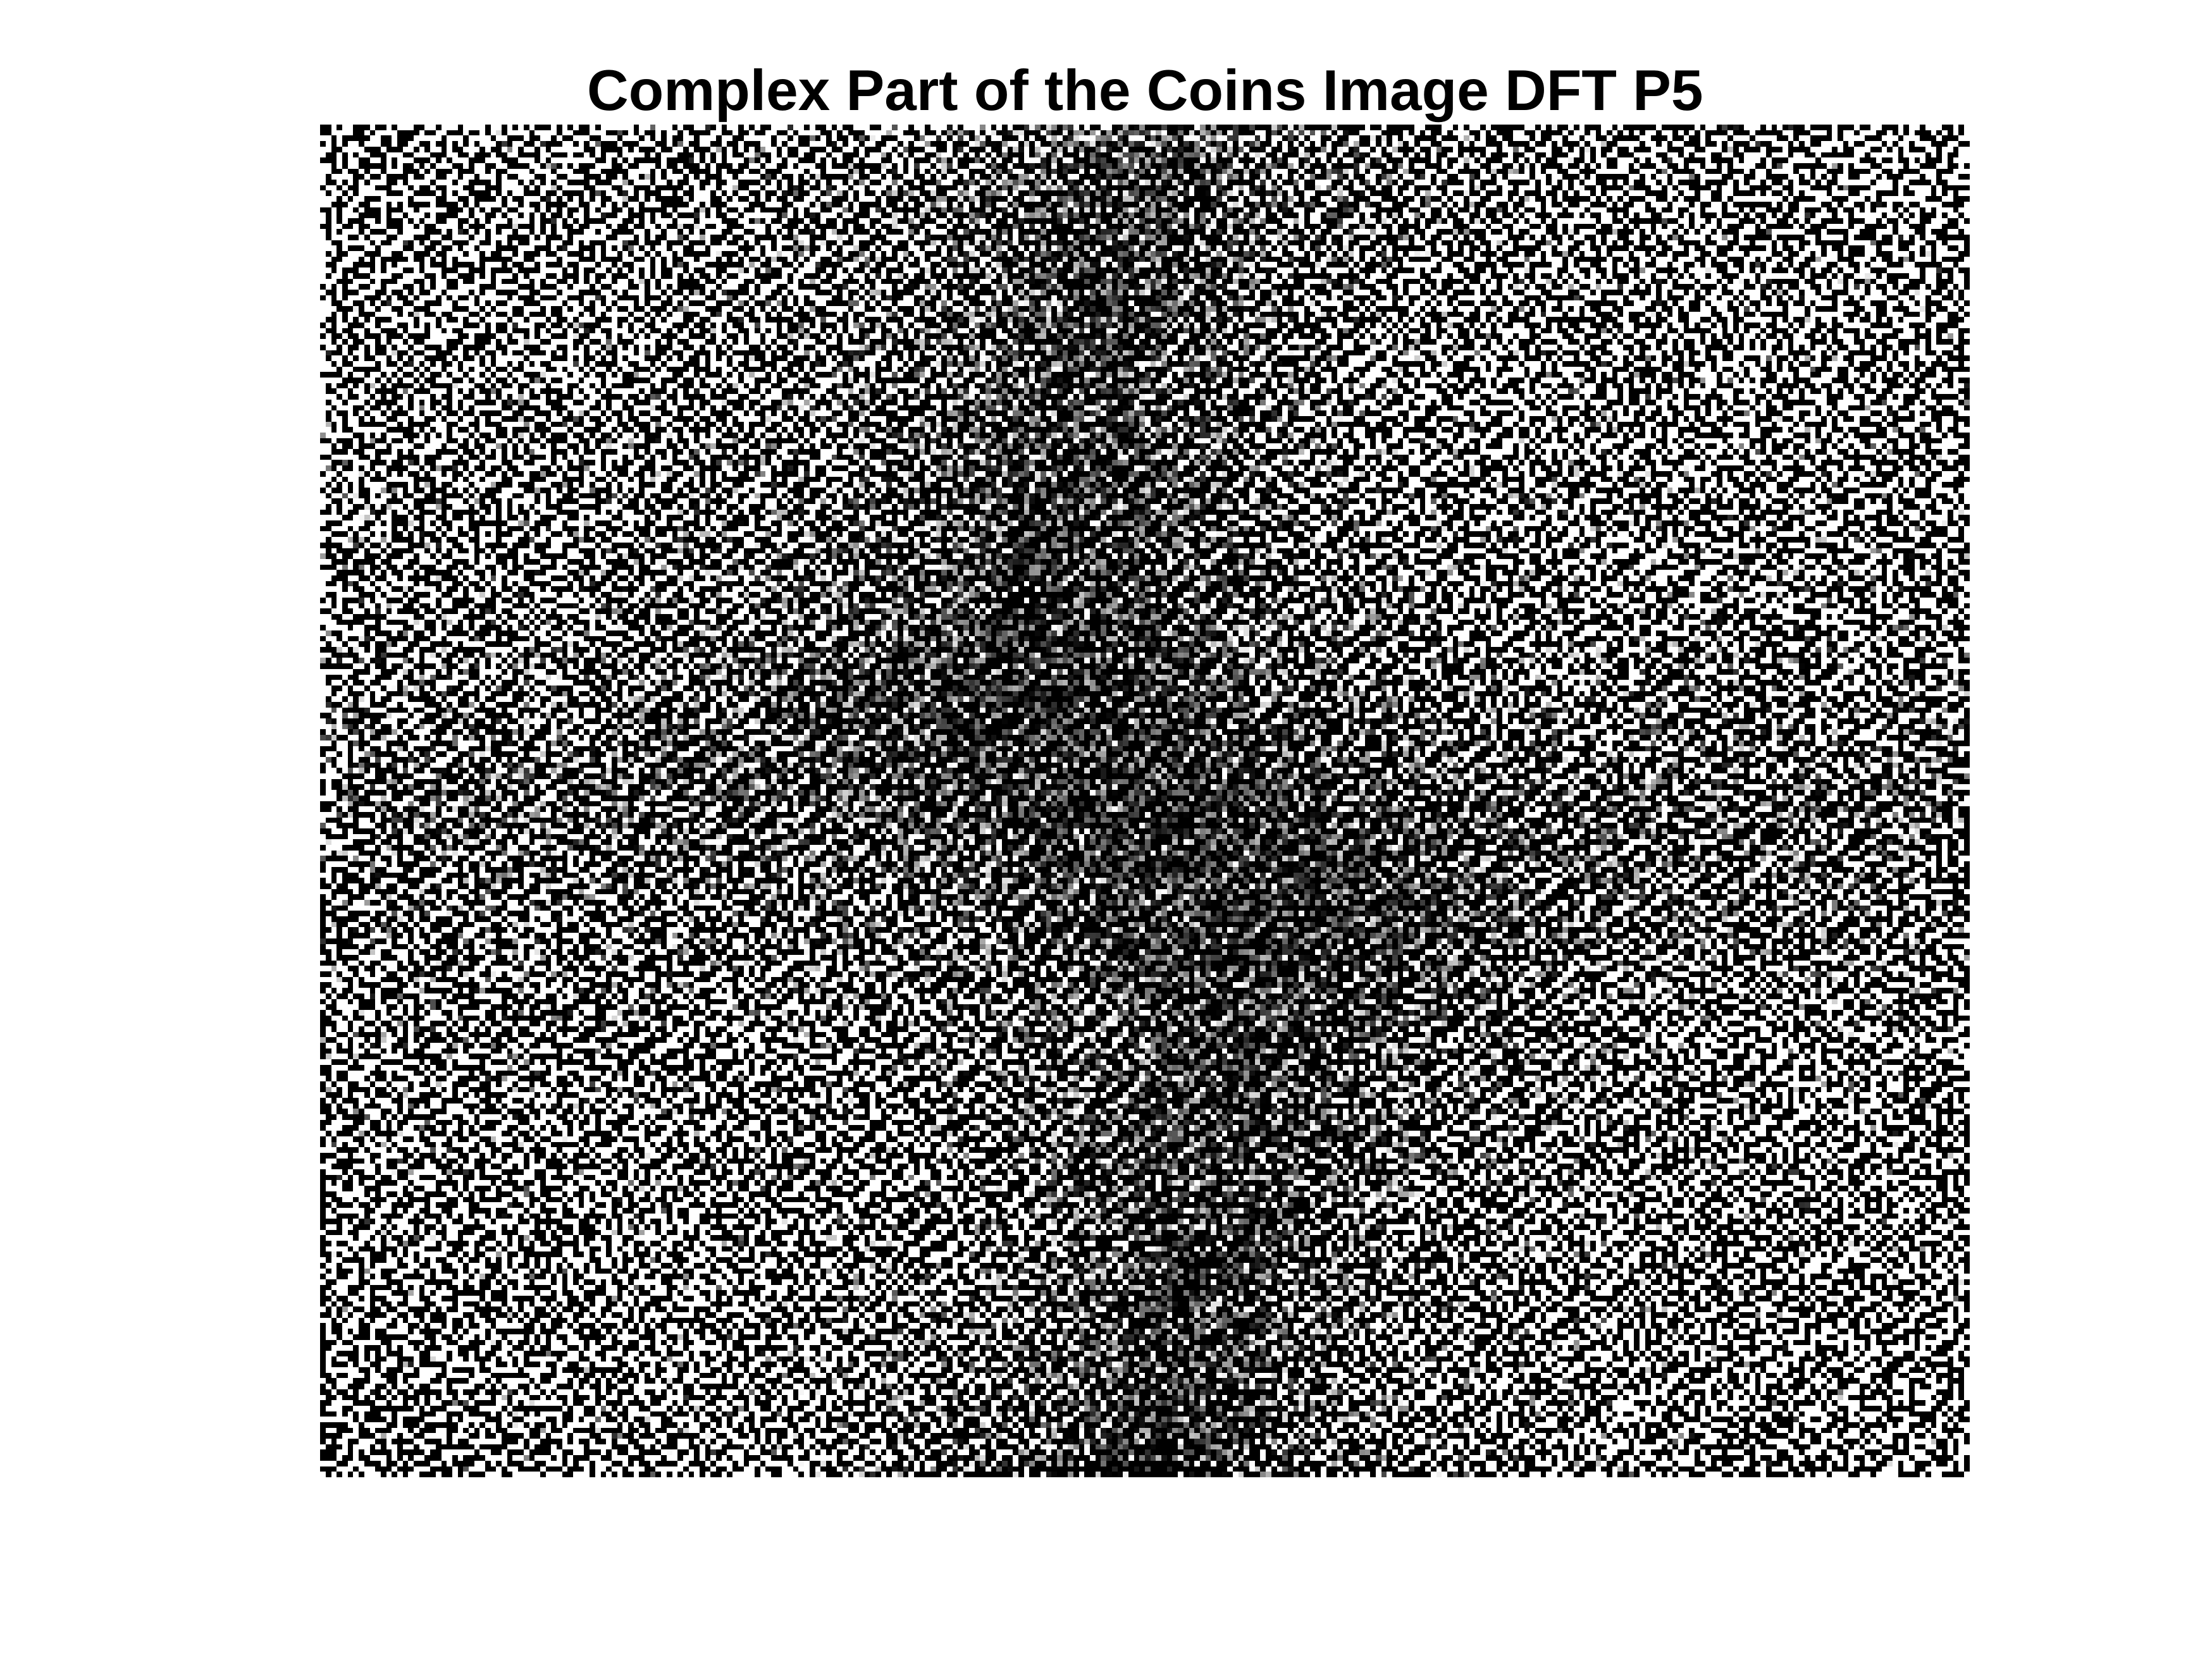

In [4]:

figure;
imshow(imag_res);
title('Imaginary Part of the Coins Image DFT P5')


Here we are simply computing the inverse by noting the unitarity of the DFT. This approach is the same as the one discussed in my notes!



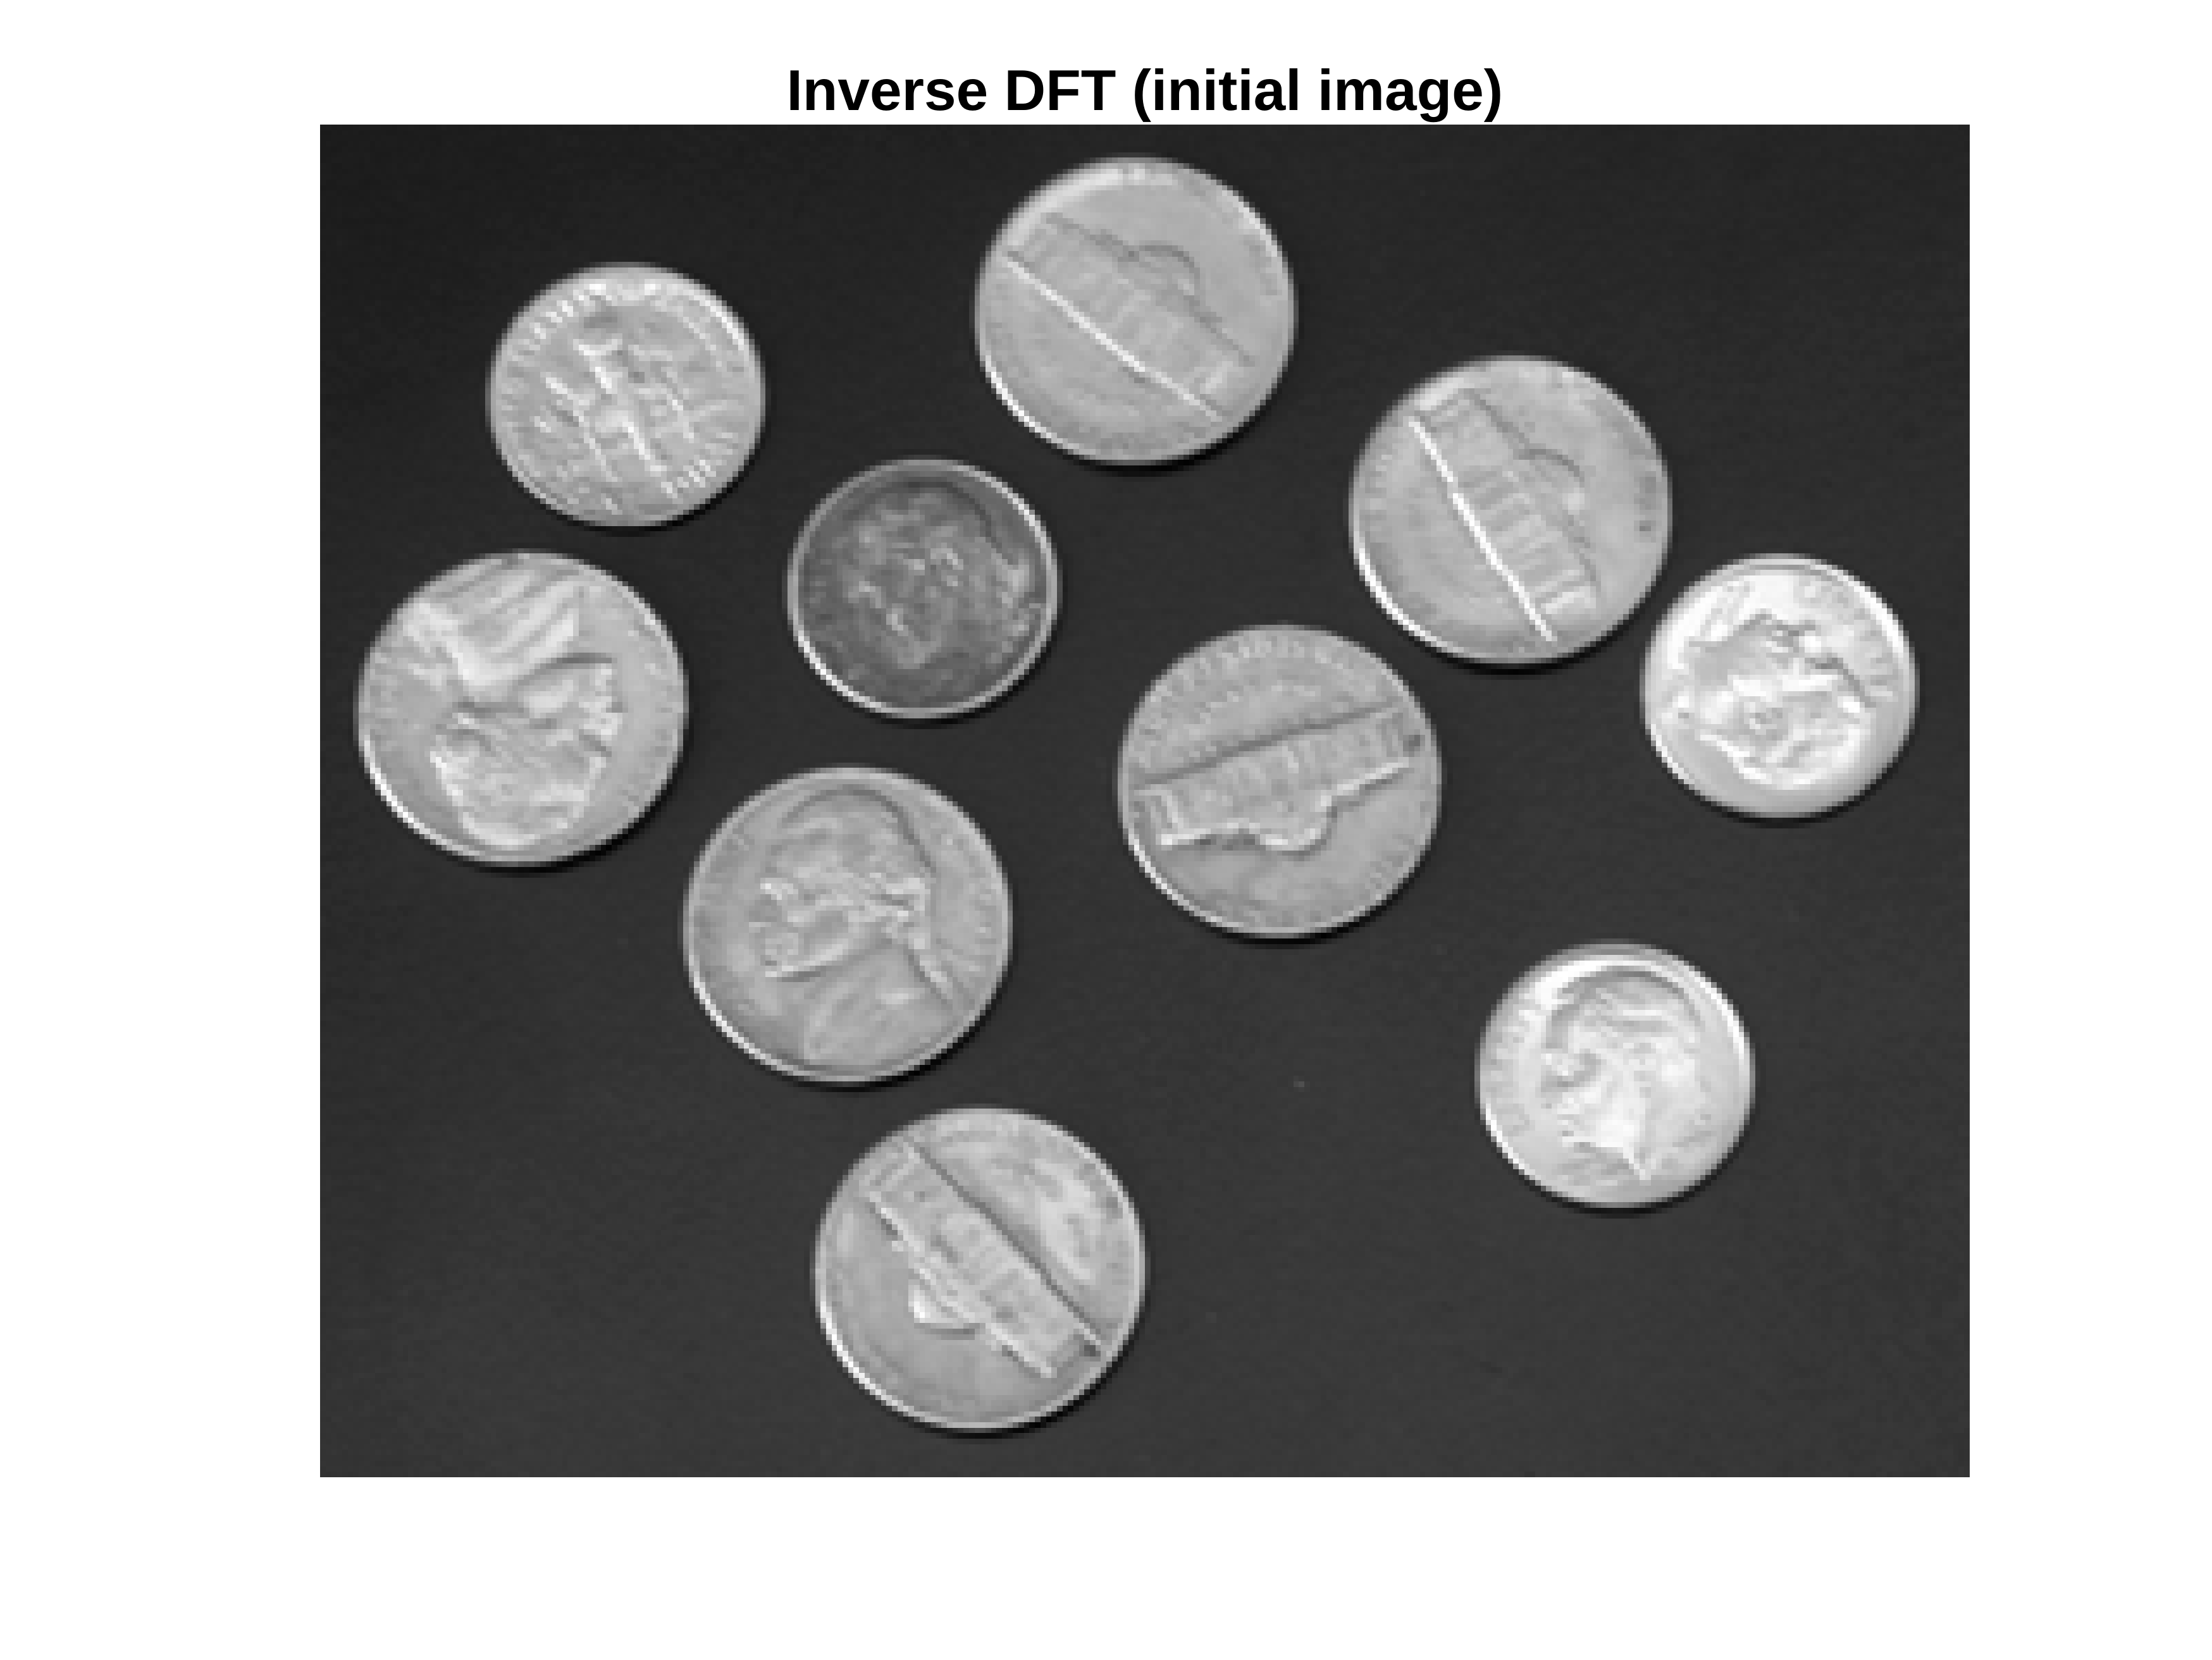

In [5]:
%note that for the orthogonal DFT, the inverse is simply the conjugate of
%the matrices applied back on the image

inverse_dft_cols = conj(dft_cols)/(sqrt(l));
inverse_dft_rows = conj(dft_rows)/(sqrt(w));
inverse_res = (inverse_dft_rows*res*inverse_dft_cols);

figure;
imshow(real(inverse_res), []);
title('Inverse DFT (initial image)');


Here is the initial image again!

